# Tools to use this repository 

In [1]:
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import networkx as nx



from src.environment.tree import Tree
from src.environment.env import Environment, PolarizedEnvironment

## Tree


--- Tous les nœuds de l'arbre ---
Nom: A, Valeur corrigée: 10.0000, Niveau: 0
Nom: B, Valeur corrigée: 0.8000, Niveau: 1
Nom: C, Valeur corrigée: 0.6000, Niveau: 1
Nom: D, Valeur corrigée: 0.0400, Niveau: 2
Nom: E, Valeur corrigée: 0.0700, Niveau: 2
Nom: F, Valeur corrigée: 0.0500, Niveau: 2
Nom: G, Valeur corrigée: 0.0020, Niveau: 3
Nom: H, Valeur corrigée: 0.0030, Niveau: 3
Nom: I, Valeur corrigée: 0.0010, Niveau: 3
Nom: J, Valeur corrigée: 0.0090, Niveau: 3

--- Feuilles de l'arbre ---
Nom: G, Valeur corrigée: 0.0020
Nom: H, Valeur corrigée: 0.0030
Nom: I, Valeur corrigée: 0.0010
Nom: J, Valeur corrigée: 0.0090

--- Parcours DFS ---
['root', 'C', 'F', 'J', 'I', 'B', 'E', 'H', 'D', 'G']

--- Parcours BFS ---
['root', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

--- Chemin avec somme maximale ---
Somme maximale : 10.8730
Chemin (index des enfants à chaque étape) : [0, 1, 0]


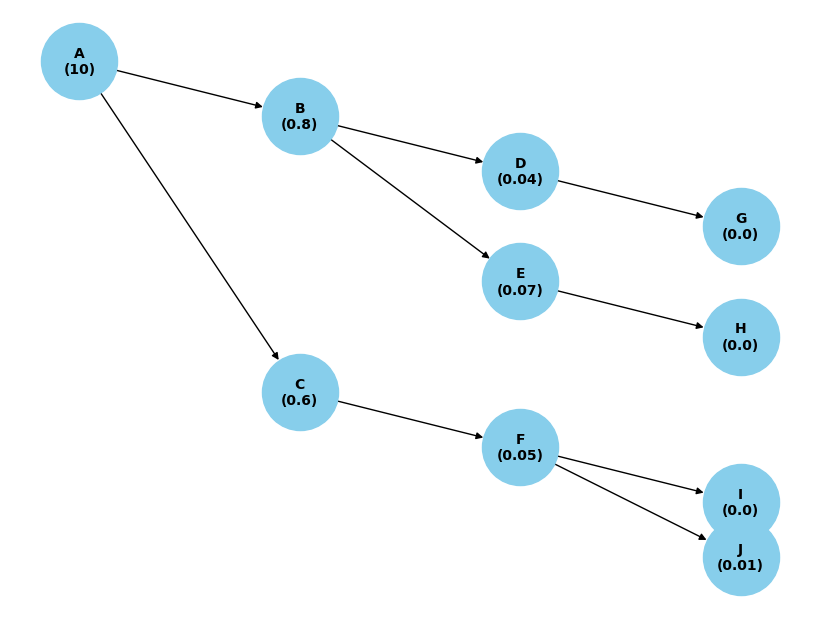

In [2]:
# --- Création de l'arbre et insertion de nœuds ---
tree = Tree()

# Insertion du nœud racine
root = tree.insert(None, ("A", 10))  # A est la racine

# Insertion de nœuds enfants
b, _ = tree.insert(root, ("B", 8))
c, _ = tree.insert(root, ("C", 6))

# Niveau 2
d, _ = tree.insert(b, ("D", 4))
e, _ = tree.insert(b, ("E", 7))
f, _ = tree.insert(c, ("F", 5))

# Niveau 3
tree.insert(d, ("G", 2))
tree.insert(e, ("H", 3))
tree.insert(f, ("I", 1))
tree.insert(f, ("J", 9))

# --- Affichage des informations sur les nœuds ---
print("\n--- Tous les nœuds de l'arbre ---")
all_nodes = tree.get_all_nodes()
for node in all_nodes:
    print(f"Nom: {node.name}, Valeur corrigée: {node.value:.4f}, Niveau: {node.level}")

# --- Feuilles de l'arbre ---
print("\n--- Feuilles de l'arbre ---")
leaves = tree.get_all_leaves()
for leaf in leaves:
    print(f"Nom: {leaf.name}, Valeur corrigée: {leaf.value:.4f}")

# --- Parcours DFS et BFS ---
print("\n--- Parcours DFS ---")
dfs_order = tree.iterative_dfs()
print(dfs_order)

print("\n--- Parcours BFS ---")
bfs_order = tree.iterative_bfs()
print(bfs_order)

# --- Chemin de la somme maximale ---
print("\n--- Chemin avec somme maximale ---")
max_sum, best_path = tree.find_best_arm_path()
print(f"Somme maximale : {max_sum:.4f}")
print(f"Chemin (index des enfants à chaque étape) : {best_path}")

tree.visualize_tree()


## Env

Récompense de la meilleure stratégie :  0.7491961154948836


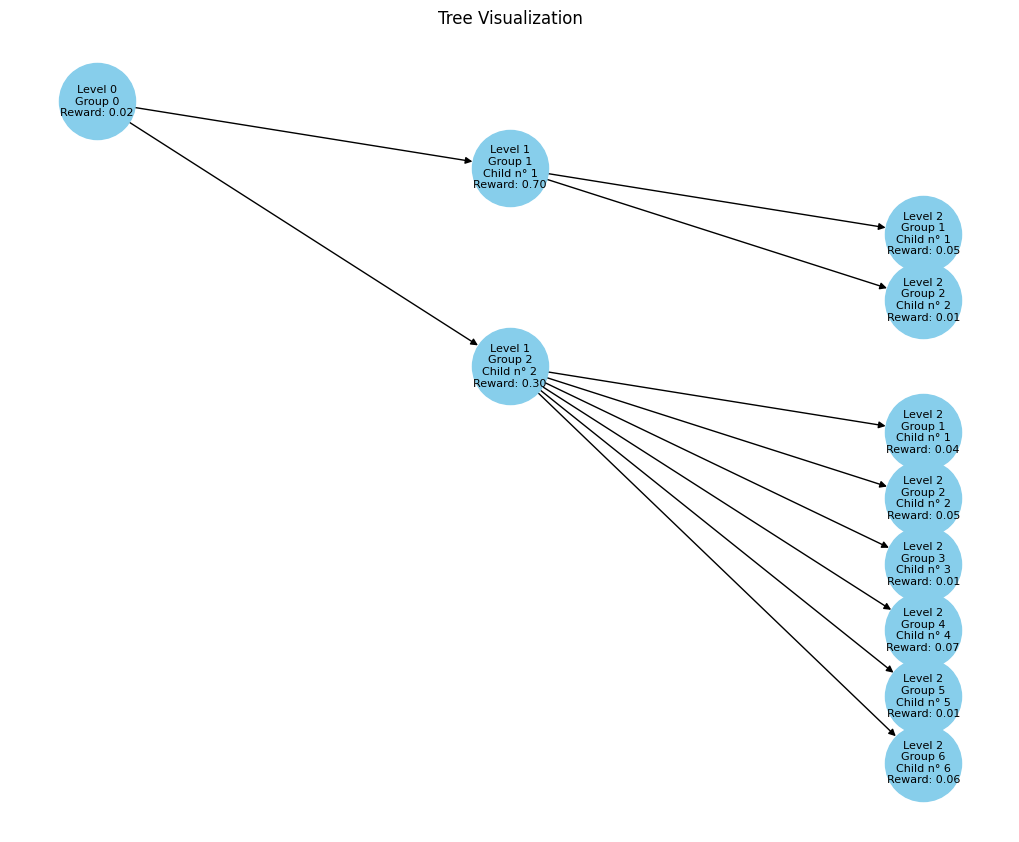

In [3]:
# Example of using the Environment class
env = Environment(rd=42, nb_leaves_per_class=3, nb_levels=2, node_distribution='imbalanced')
env.set()
print("Récompense de la meilleure stratégie : ", env.get_best_strategy_reward())
env.visualize_tree()

Best strategy reward:  0.8591961154948836


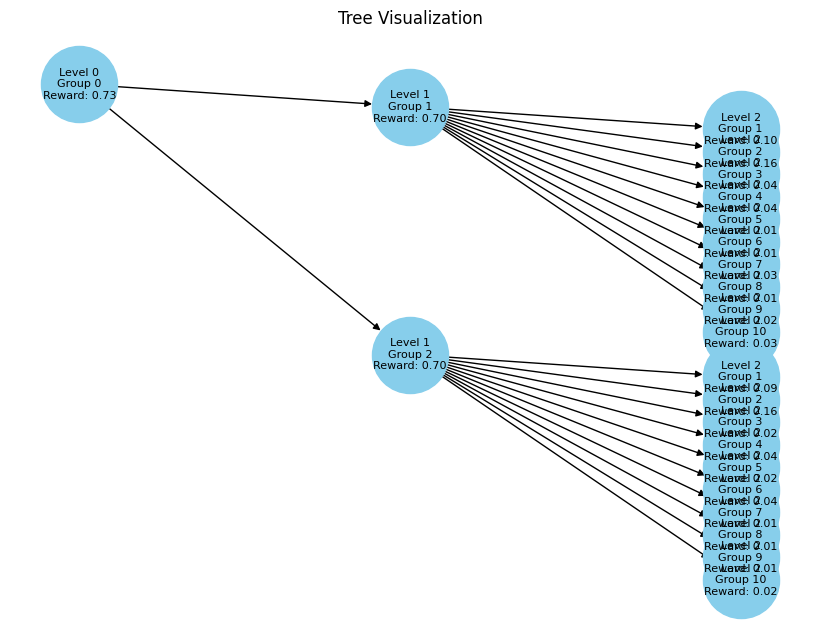

In [4]:
params = {
    'rd': 42,
    'nb_leaves_per_class': 2,
    'nb_levels': 3,
    'node_distribution': 'unbalanced'
}

# Initialize the polarized environment with the provided parameters.
env = PolarizedEnvironment(**params)
env.set()  # Set up the environment and calculate the best strategy.
print("Best strategy reward: ", env.get_best_strategy_reward())  # Print the reward for the best strategy.
env.visualize_tree()  # Visualize the tree structure.